## 20 Years of Games -- IGN Dataset

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings
%matplotlib inline
warnings.filterwarnings("ignore")



ign_df = pd.read_csv("ign.csv") # DataForm


ign_df = ign_df.drop("url", axis=1) # no need to analyze the url#

colnames = list(ign_df.columns.values)
print(ign_df.shape[0])

ign_df.head()

18625


,Unnamed: 0,score_phrase,title,platform,score,genre,editors_choice,release_year,release_month,release_day
0,0,Amazing,LittleBigPlanet PS Vita,PlayStation Vita,9.0,Platformer,Y,2012,9,12
1,1,Amazing,LittleBigPlanet PS Vita -- Marvel Super Hero E...,PlayStation Vita,9.0,Platformer,Y,2012,9,12
2,2,Great,Splice: Tree of Life,iPad,8.5,Puzzle,N,2012,9,12
3,3,Great,NHL 13,Xbox 360,8.5,Sports,N,2012,9,11
4,4,Great,NHL 13,PlayStation 3,8.5,Sports,N,2012,9,11


### Console wars with data: What's the best platform? 

In [4]:

g_per_platform = []
for platform,data in ign_df.groupby('platform'):
    if data.shape[0] >= 70: #filter platforms with little games
        g_per_platform.append((platform,data.score.mean(),data.shape[0]))
    
g_per_platform = pd.DataFrame.from_records(g_per_platform,
                                    columns=('name','avg_score','n_games'))
g_per_platform = g_per_platform.sort('avg_score')

g_per_platform


,name,avg_score,n_games
2,Game Boy Color,6.193820,356
8,Nintendo DS,6.286986,1045
17,Wii,6.299268,1366
9,Nintendo DSi,6.375197,254
11,PlayStation,6.582458,952
1,Game Boy Advance,6.626645,623
15,PlayStation Portable,6.748499,633
12,PlayStation 2,6.866548,1686
7,Nintendo 64,6.976490,302
3,GameCube,7.042436,509


It's sad to see Nintendo taking the 4 first places on worst average score; I sure expected to see the Nintendo Wii heading the list, but the GBC is surely a surprise. It also reassures us of what we already knew: The Macintosh is the ultimate gamer platform (sarcasm!). 

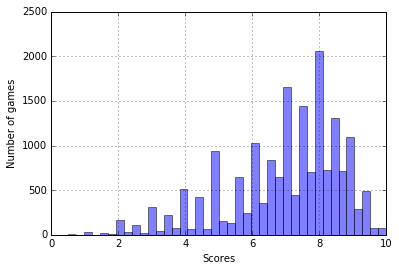

In [5]:
# remove platforms with a small number of entries
df= ign_df[ign_df['platform'].isin(g_per_platform.name)]

hist = df['score'].hist(alpha=0.5,bins=40)
hist.set_xlabel('Scores')
hist.set_ylabel('Number of games')


The entire dataset doesn't seem to follow a well known distribution. The mode lies around 8.0, which indicates that, if you pick a game at random, it's got a better chance of being good than bad. 

### The platform with the most "Editor's Choice" awards

In [6]:
awards = []
award_rates = []
for plat,data in df.groupby('platform'):
    n_awards = data[data['editors_choice'] == 'Y'].shape[0]
    
    awards.append((plat,n_awards,data.shape[0],n_awards/data.shape[0]))
awards = pd.DataFrame.from_records(awards,
                                    columns=('platform','n_awards','n_games','award_rate'))



awards

,platform,n_awards,n_games,award_rate
0,Dreamcast,59,286,0.206294
1,Game Boy Advance,99,623,0.158909
2,Game Boy Color,32,356,0.089888
3,GameCube,110,509,0.216110
4,Lynx,0,82,0.000000
5,Macintosh,40,81,0.493827
6,Nintendo 3DS,43,225,0.191111
7,Nintendo 64,42,302,0.139073
8,Nintendo DS,100,1045,0.095694
9,Nintendo DSi,23,254,0.090551


In [ ]:
bar = awards[['award_rate']].plot.bar(x=awards['platform'],
                                legend=False)
bar.set_ylabel('award_rate')

And again, the Macintosh gets the prize! For every two Mac games reviewed on the site, one gets the Editor's Choice. The number of Mac games is not that big (81 samples in the database), so we can't say get many conclusions.

### Game releases by month
`
It's common knowledge a great part of the games come out
by the end of the year. Let's make an histogram by months to see if it's true.
`

In [7]:
month_list = ['January','February','March','April','May','June',
                 'July','August','September','October',
                     'November','December']

by_month = []
for month,data in ign_df.groupby('release_month'):
    by_month.append((month_list[month-1],data.score.mean(),data.shape[0]))
                    
by_month = pd.DataFrame.from_records(by_month,
                                    columns=('month','avg_score','n_games'))

by_month

,month,avg_score,n_games
0,January,6.694681,1128
1,February,6.998116,1327
2,March,7.023776,1573
3,April,6.890744,1264
4,May,6.860105,1143
5,June,6.936413,1483
6,July,6.854286,1190
7,August,7.079895,1338
8,September,7.237024,1707
9,October,7.067143,2310


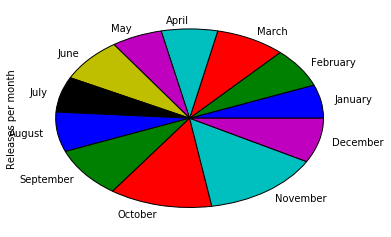

In [8]:
by_month = by_month[['month','n_games']]
pie = by_month.plot.pie('n_games',labels=month_list,
                       legend=False)
pie.set_ylabel('Releases per month')


That confirms what we already knew: almost 30% of all games are published during October and November. Also notice that the average 
score in december is lower than the average. Maybe the december games are released in a hurry!

### Growth of the industry

Let's check how the growth of the game industry in releases per year.

,year,avg_score,n_games
0,1970,8.500000,1
1,1996,6.161745,149
2,1997,6.566341,205
3,1998,6.930678,339
4,1999,6.983484,775
5,2000,6.693589,1045
6,2001,7.120494,688
7,2002,6.978526,936
8,2003,7.198246,969
9,2004,7.170712,997


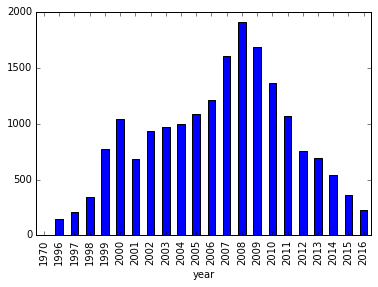

In [9]:
by_year = []
for year,data in ign_df.groupby('release_year'):
    by_year.append((year,data.score.mean(),data.shape[0]))
                    
by_year = pd.DataFrame.from_records(by_year,
                                    columns=('year','avg_score','n_games'))

bar = by_year[['n_games']].plot.bar(x=by_year['year'],
                                legend=False)

by_year

I didn't expect that; There seems to be a slowdown in the game industry going on. But before making any conclusions, let's filter for unique title and do it again.

(The 1970's game is an 'Easter Egg' introduced by IGN)

,year,n_games
0,1970,1
1,1996,134
2,1997,200
3,1998,306
4,1999,675
5,2000,888
6,2001,602
7,2002,702
8,2003,700
9,2004,734


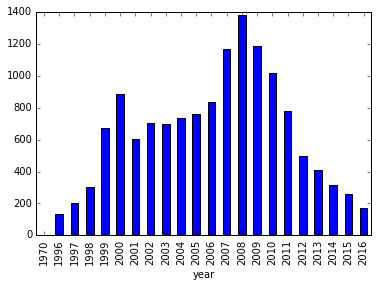

In [10]:
by_year = []
no_duplicates = ign_df[['title','release_year']].drop_duplicates()
for year,data in no_duplicates.groupby('release_year'):
    by_year.append((year,data.shape[0]))
                    
by_year = pd.DataFrame.from_records(by_year,
                                    columns=('year','n_games'))

bar = by_year[['n_games']].plot.bar(x=by_year['year'],
                                legend=False)

by_year

It seems to be roughly the same allure. Maybe IGN is stopping making reviews? Or maybe it's really a decline in the game industry? 